In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras

tf.random.set_seed = 77
np.random.seed = 77

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r'/home/vaibhav/Downloads/fruit_recognition_2/FruitsData/fruits-360/Training'

test_dir = r'/home/vaibhav/Downloads/fruit_recognition_2/FruitsData/fruits-360/Test'

In [4]:
train_gen = ImageDataGenerator(rescale=1./255.,validation_split=.35)
test_gen = ImageDataGenerator( rescale=1./255. )

In [5]:
train_data = train_gen.flow_from_directory(train_dir,
                                           (100,100),
                                           class_mode='sparse',
                                           batch_size=400,
                                          subset='training')

valid_data = train_gen.flow_from_directory(train_dir,
                                          (100,100),
                                          class_mode='sparse'
                                          ,batch_size=400,
                                          subset='validation')

Found 44053 images belonging to 131 classes.
Found 23639 images belonging to 131 classes.


In [6]:
model = keras.models.Sequential()

2021-08-29 18:59:37.742315: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-29 18:59:37.742618: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-29 18:59:37.744080: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
from tensorflow.keras import layers

In [8]:
model.add(layers.Conv2D(25,(3,3),activation = "relu",input_shape=[100,100,3]))

In [9]:
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(50,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(100,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(100,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.MaxPooling2D((4,4)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(200,activation = "relu"))
model.add(layers.Dense(150,activation = "relu"))

model.add(layers.Dense(131,activation = "softmax"))

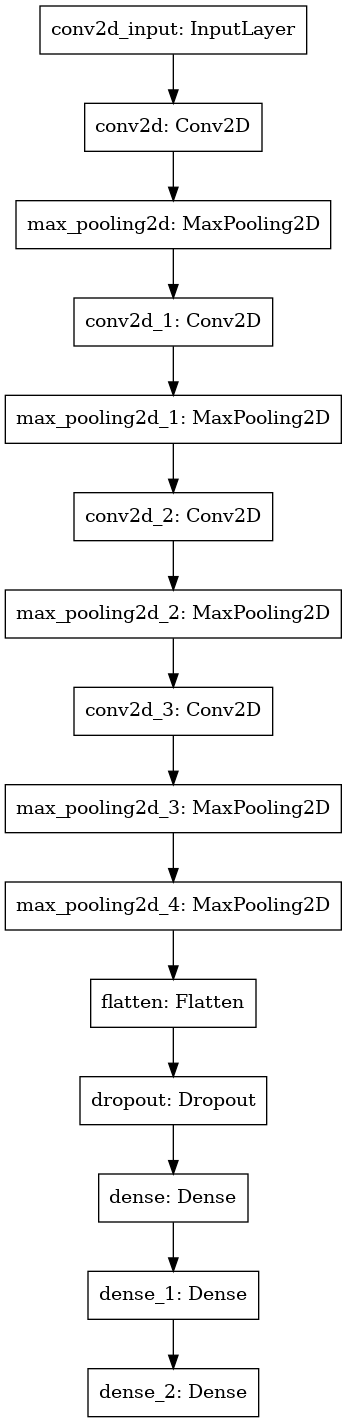

In [10]:
keras.utils.plot_model(model)

In [11]:
model.compile(keras.optimizers.RMSprop(lr=0.001),"sparse_categorical_crossentropy",["acc"])

In [12]:
model_his = model.fit_generator(train_data,
                                110,
                                20,
                               validation_data=valid_data,
                               validation_steps=59)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-08-29 18:59:46.483820: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-29 18:59:46.503965: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593275000 Hz


Epoch 1/20
110/110 [==============================] - 196s 2s/step - loss: 4.2485 - acc: 0.0589 - val_loss: 2.8749 - val_acc: 0.1902
Epoch 2/20
110/110 [==============================] - 199s 2s/step - loss: 2.4368 - acc: 0.2904 - val_loss: 1.7498 - val_acc: 0.4879
Epoch 3/20
110/110 [==============================] - 203s 2s/step - loss: 1.7146 - acc: 0.4754 - val_loss: 1.5330 - val_acc: 0.5436
Epoch 4/20
110/110 [==============================] - 202s 2s/step - loss: 1.2718 - acc: 0.5980 - val_loss: 0.8697 - val_acc: 0.7880
Epoch 5/20
110/110 [==============================] - 204s 2s/step - loss: 0.9067 - acc: 0.7218 - val_loss: 0.7383 - val_acc: 0.8058
Epoch 6/20
110/110 [==============================] - 203s 2s/step - loss: 0.7369 - acc: 0.7654 - val_loss: 0.7794 - val_acc: 0.7756
Epoch 7/20
110/110 [==============================] - 204s 2s/step - loss: 0.6136 - acc: 0.8066 - val_loss: 0.9960 - val_acc: 0.7382
Epoch 8/20
110/110 [==============================] - 204s 2s/step - 

<AxesSubplot:>

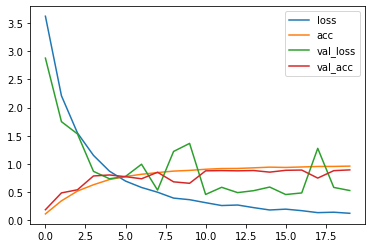

In [15]:
pd.DataFrame(model_his.history).plot()

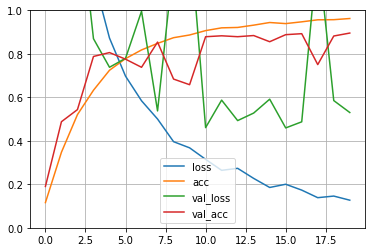

In [30]:
pd.DataFrame(model_his.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
test_data = test_gen.flow_from_directory(test_dir,(100,100),class_mode="sparse",batch_size=25)

Found 22688 images belonging to 131 classes.


In [18]:
model.evaluate_generator(test_data)

/home/vaibhav/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2540549635887146, 0.9506787657737732]